![title](Pic_1.png)

In [3]:
# Lecture "Basic Math Tools"
# Supplementary Material
#
# Technische Universität München, Fakultät für Informatik
# Dr. Tobias Lasser, Richard Brosig, Jakob Vogel, Rüdiger Göbl
# 2019
%matplotlib notebook

import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
import math

system_size = 60

# flase path in the original file, need some small revision
mat_contents = sio.loadmat('system_' + str(system_size) + '.mat')
A = np.asarray(mat_contents['A'], np.double)
b = np.asarray(mat_contents['b'], np.double)
x = np.asarray(mat_contents['x'], np.double)

# Add noise to the measurements
b_noise = b + np.random.randn(b.shape[0], b.shape[1])*0.1

<IPython.core.display.Javascript object>


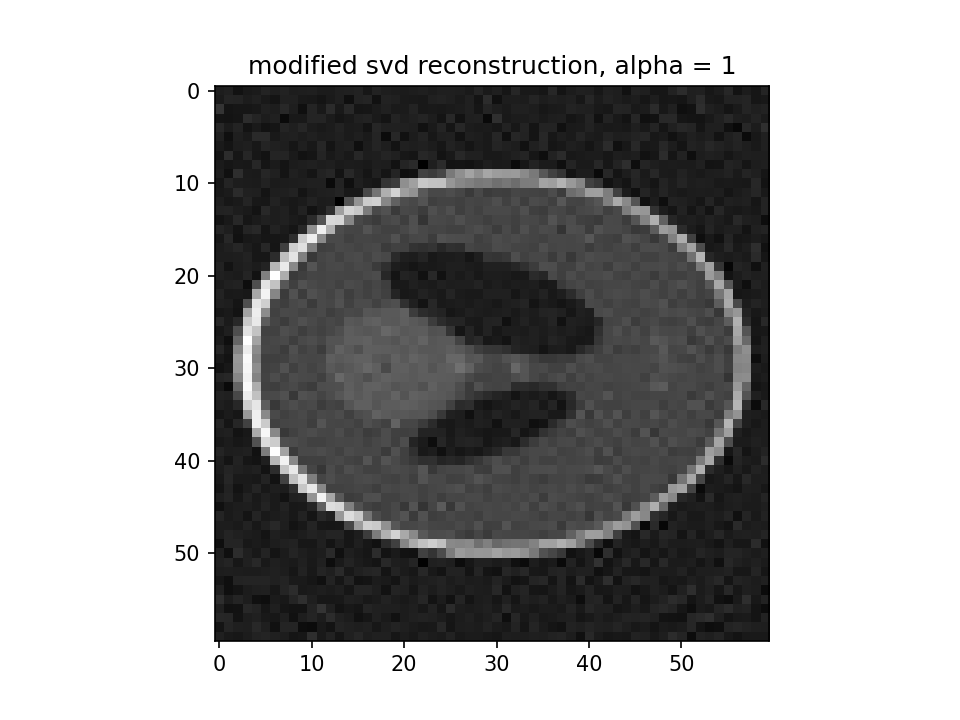

Text(0.5, 1.0, 'modified svd reconstruction, alpha = 1')

In [5]:
# a)
alpha = 1
[U, Sig, V] = np.linalg.svd(A)
Dalp = np.diag(Sig / (Sig**2 + alpha))
x_a = np.matmul(V.T, np.matmul(Dalp, np.matmul(U.T, b_noise)))
plt.figure()
plt.imshow(x_a.reshape((system_size, system_size)), cmap='gray')
plt.title('modified svd reconstruction, alpha = 1')

Cannot solve stacked system directly, it is not square


<IPython.core.display.Javascript object>


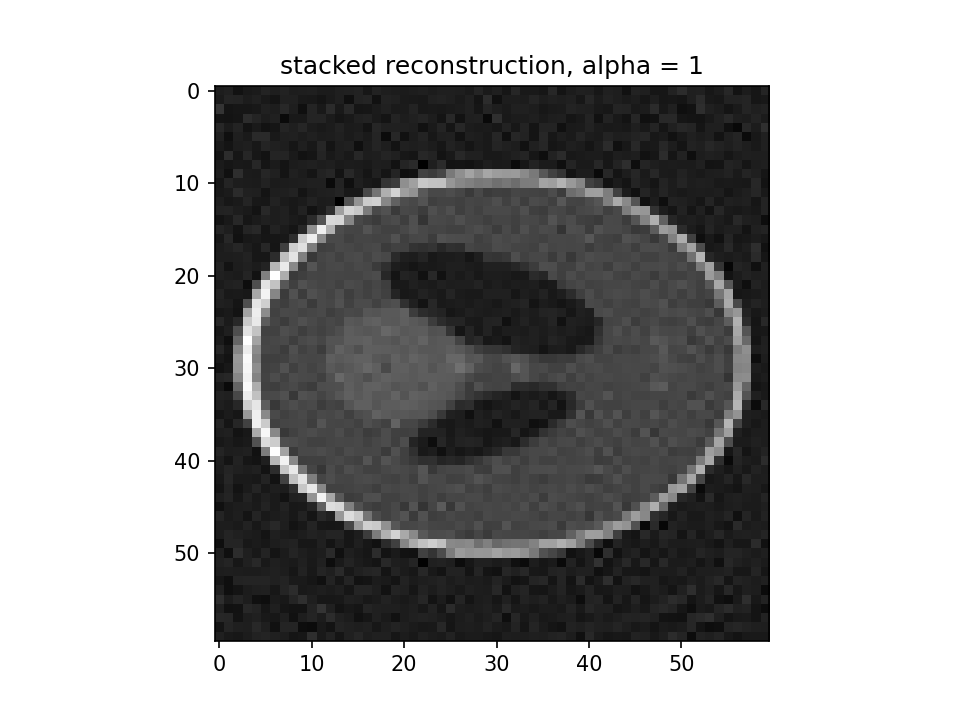

Text(0.5, 1.0, 'stacked reconstruction, alpha = 1')

In [6]:
# b)
Atilde = np.concatenate((A, math.sqrt(alpha)*np.eye(system_size**2)), 0)
btilde = np.concatenate((b_noise, np.zeros((system_size**2, 1))), 0)
x_stacked = np.linalg.solve(np.matmul(Atilde.T, Atilde), np.matmul(Atilde.T, btilde))
try:
    x_stacked_orgsystem = np.linalg.solve(Atilde, btilde)
except np.linalg.LinAlgError:
    print("Cannot solve stacked system directly, it is not square")
plt.figure()
plt.imshow(x_stacked.reshape((system_size, system_size)), cmap='gray')
plt.title('stacked reconstruction, alpha = 1')

<IPython.core.display.Javascript object>


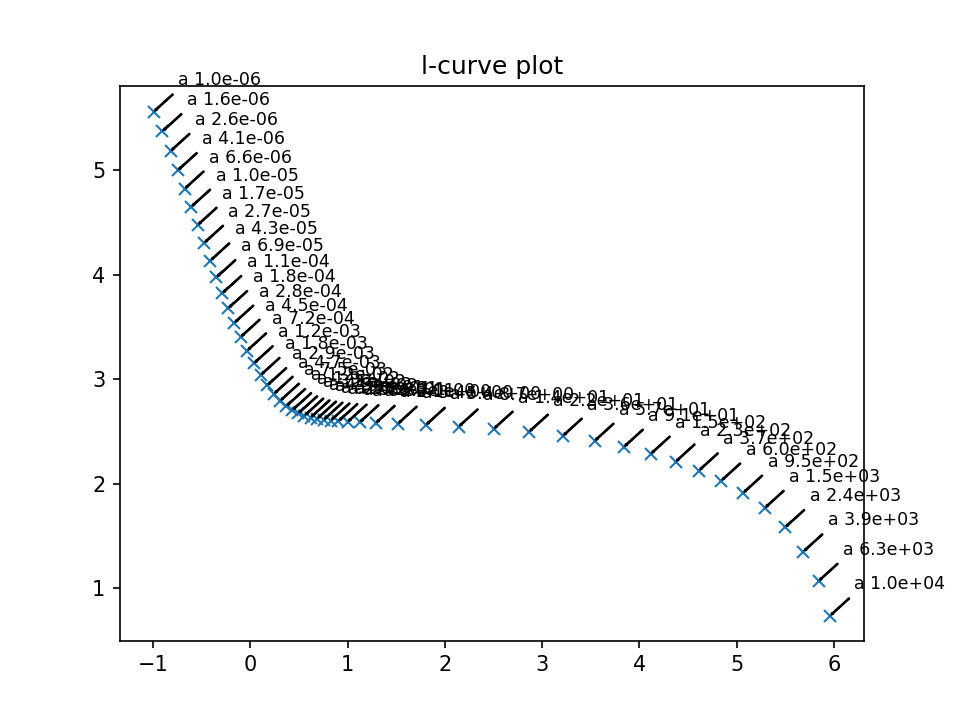

In [7]:
# c)
alphas = 10**np.linspace(-6, 4, num=50)
entries = np.zeros((3, len(alphas)))
for i in range(0, len(alphas)):
    al = alphas[i]
    Dalp = np.diag(Sig / (Sig ** 2 + al))
    x_cur = np.matmul(V.T, np.matmul(Dalp, np.matmul(U.T, b_noise)))
    residual = np.linalg.norm(np.matmul(A, x_cur) - b_noise)
    norm = np.linalg.norm(x_cur)
    entries[0, i] = al
    entries[1, i] = math.log(residual)
    entries[2, i] = math.log(norm)

fig = plt.figure()
plt.plot(entries[1, :], entries[2, :], 'x')

for i in range (0, len(alphas)):
    x = entries[1, i]
    y = entries[2, i]
    plt.annotate("a " + '{0:.1e}'.format(entries[0, i]), xy=(x, y), xytext=(x+0.25, y + 0.25), size='small',
                arrowprops=dict(facecolor='black', shrink=0.05, width=0.25, headwidth=0.75, headlength=0.75),
                )
plt.title('l-curve plot');

<IPython.core.display.Javascript object>


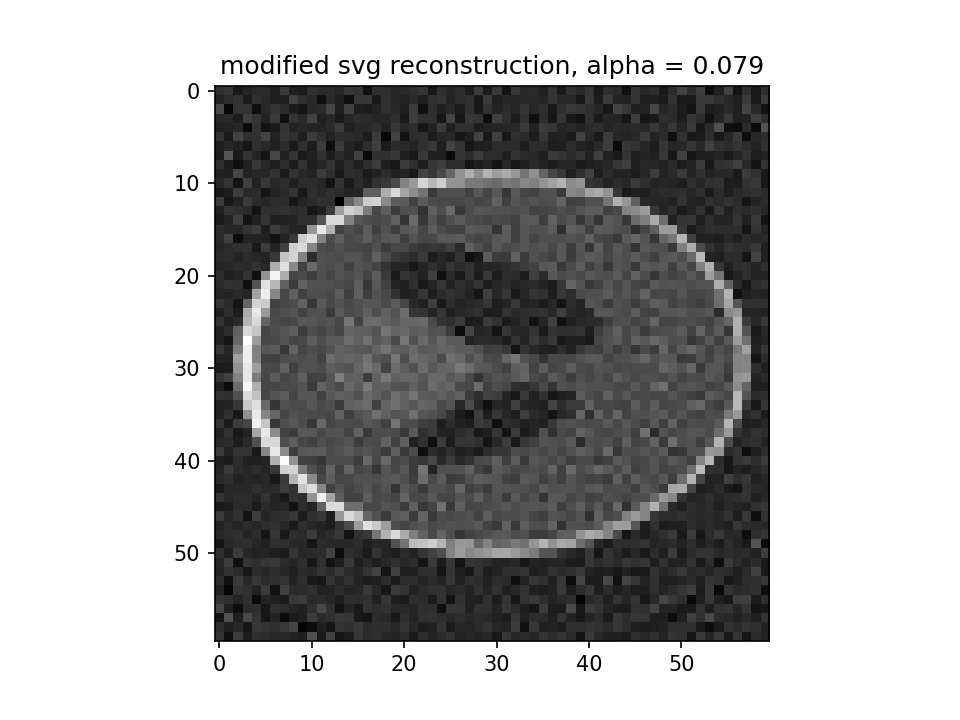

In [8]:
# from that we determined the best alpha
alpha = 0.0790
Dalp = np.diag(Sig / (Sig**2 + alpha))
x_a = np.matmul(V.T, np.matmul(Dalp, np.matmul(U.T, b_noise)))
plt.figure()
plt.imshow(x_a.reshape((system_size, system_size)), cmap='gray')
plt.title('modified svg reconstruction, alpha = ' + str(alpha))
plt.show()

In [ ]:
#d) How does the regularized solution to the noisy system relate to a solution of the original 
#   problem? (regularized and not regularized?